(visualization:matplotlib:basics)=
# Matplotlib Basics

Matplotlib provides two interfaces for plotting:
* [MATLAB](https://en.wikipedia.org/wiki/MATLAB) like state-based interface,
* object-oriented interface.

## State-Based Plotting

The state-based interface is known as [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html).

Data to be plotted is passed to Matplotlib as NumPy arrays or other array-like types. Thus, we need the following standard imports for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We first need a place where all the plotting is done. Matplotlib calls this a *figure*. To create one call [`figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

In [2]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

We see two lines of output. The first line is the object returned by `plt.figure()`, which is printed by Jupyter because Jupyter always prints the result of the last line of code. The second line in the output is the drawing area, which is replaced by a describing string, because it's empty at the moment.

Simple line plots can be created with [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

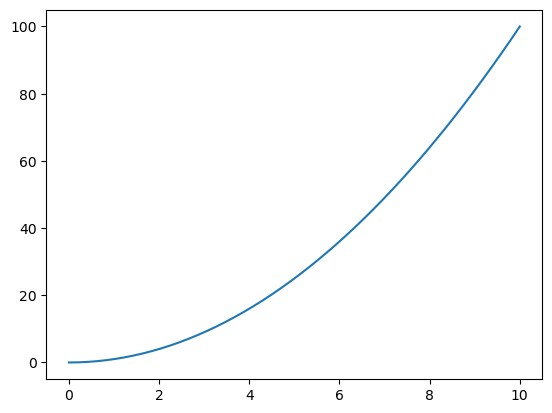

In [3]:
x = np.linspace(0, 10)
y = x ** 2

plt.plot(x, y)

Jupyter automatically copies the drawing area created above by `plt.figure()` to the next code cell.

Note that `plot` only plots in the background. To see the plot on screen one has to call [`show`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html). This is automatically done by Jupyter at the end of each code block containing calls to `pyplot` functions. But before this call Jupyter prints the result of the last code line. If a code block ends with an explicit call to `show`, then jupyter does not produce any automatic output.

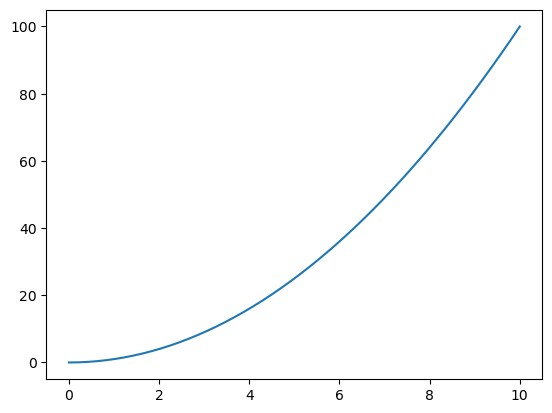

In [4]:
plt.plot(x, y)
plt.show()

We should add axes labels and a title to the plot.

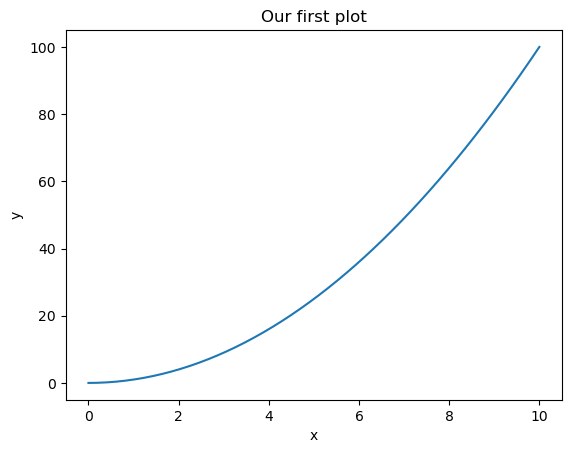

In [5]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our first plot')
plt.show()

Above we mentioned that `pyplot` provides a *state-based* interface to Matplotlib. That is, we do not have to tell `pyplot` to which plot we want to add a title. Instead every operation applies to the *current* plot. Having multiple plots (see below) we have to take care about what `pyplot`'s current plot is when calling functions like [`xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) or [`title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html). But for simple plotting tasks the state-based interface requires fewer lines of code than the object-oriented interface.

```{hint}
**Plotting in simple Python shell**

In a simple Python shell the plot does not automatically show up after calling `plt.plot`. To see the plot we have to call `show`. 

The `show` function not only shows the plot, but also stops execution of the script (i.e., blocks the shell) until the plot window is closed.
```

## Object-Oriented Plotting

To use the object-oriented interface of Matplotlib one first creates an empty figure with `pyplot` and then starts to fill it with objects.

To get a simple line plot we first have to create an [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) object, which encapsulates the coordinate system and all its surroundings. Then we can add a [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) object via [`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

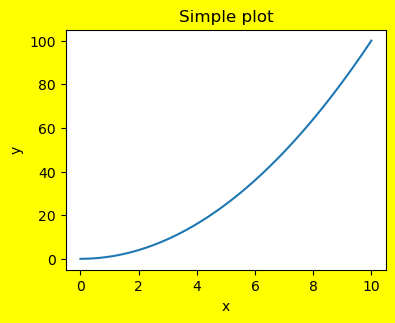

In [6]:
fig = plt.figure(facecolor='yellow')
ax = fig.add_axes((0.25, 0.25, 0.5, 0.5))

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Simple plot')

plt.show()

```{important}
The four values passed as a tuple to [`Figure.add_axes`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_axes) describe the position of the left boundary, the right boundary, the width and the height of the `Axes` object relative to the figure's width and height. So we would expect to see an `Axes` object filling half the width and height of the yellow area and positioned at one quarter of width and also of height, that is, centered. To show the result of plotting operations Jupyter exports the figure to an image file and then displays that image file. For exporting the figure size is adapted to the figures content. Thus, in a Jupyter notebook we only see the `Axes` object without wide yellow boundary. Same code in a simple Python shell produces different output!

Similar issue: The four values passed in the first argument to `add_axes` specify position and dimensions of the drawing area. Ticks and labels lie outside this area. Consequently the tuple `(0, 0, 1, 1)` results in a drawing with invisible ticks and labels outside the figure. In Jupyter notebooks this does not work, because Jupyter automatically enlarges the figure to fit the whole `Axes` object including ticks and labels.
```

Note that the `Axes.plot` function returns a `Line2D` object which can be further processed if needed.

Often it's more convenient to create the figure and the `Axes` object in one step:

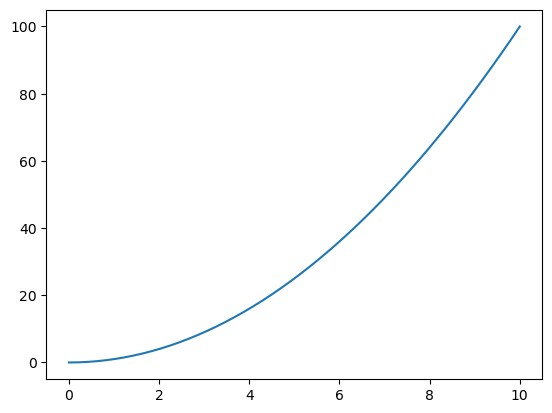

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()

Details on `pyplot.subplots` will be given below.

## Multiple Plots

### Multiple Plots in One `Axes` Object

Placing more than one line plot (or any other type of plot) in one `Axes` object is straight forward.

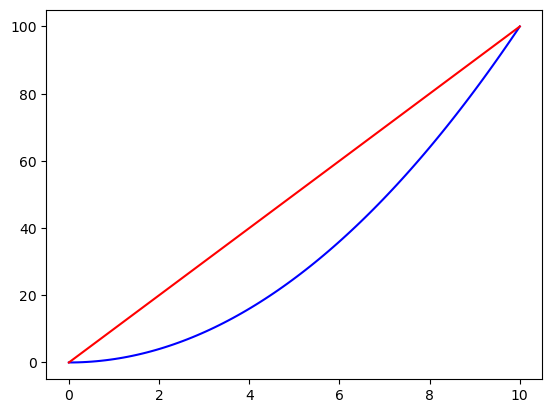

In [8]:
x = np.linspace(0, 10, 100)
y1 = x ** 2
y2 = 10 * x

fig, ax = plt.subplots()
ax.plot(x, y1, '-b')
ax.plot(x, y2, '-r')

plt.show()

### Multiple `Axes` Objects

Multiple `Axes` objects can be placed manually in a figure with `Figure.add_axes`. But there are methods in Matplotlib which support exact alignment of the `Axes` objects.

To get a grid of equally sized `Axes` objects call [`Figure.add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot).

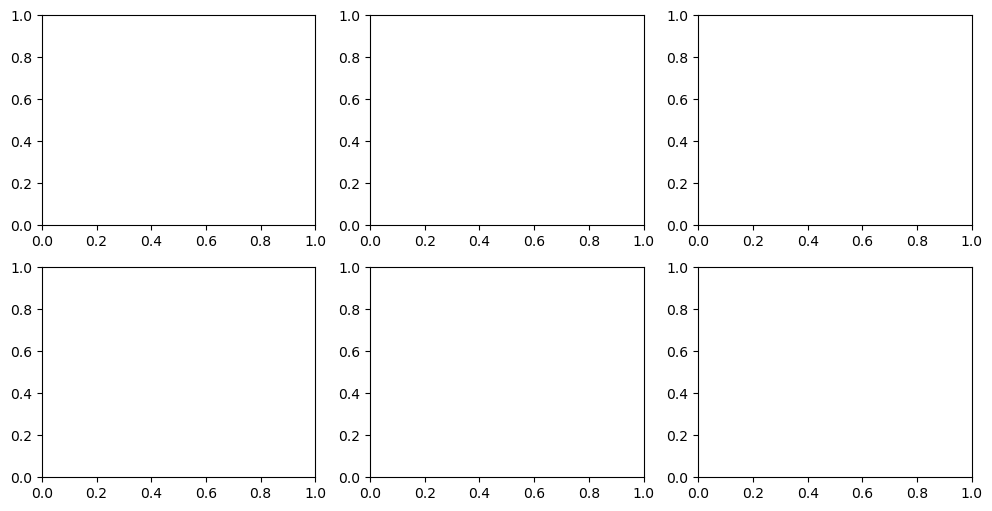

In [9]:
m = 2    # rows
n = 3    # columns

fig = plt.figure(figsize=(12, 6))

ax = m * n * [None]    # will hold Axes objects of subplots
for k in range(m * n):
    ax[k] = fig.add_subplot(m, n, k+1)

plt.show()

The third argument to `add_subplot` specifies the position in the grid. Subplots are numbered starting with 1 in the upper left corner, then continuing to the right and then to the next row.

```{hint}
The [`pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) method creates a new figure and grid of `Axes` objects. It returns the `Figure` object and a list of `Axes` objects.
```

More advanced grid layouts with subplots occupying more than one cell can be created with [`Figure.add_gridspec`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_gridspec). This method returns a [`GridSpec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) object, which then can be used to specify the cells occupied by a subplot via NumPy style indexing and slicing.

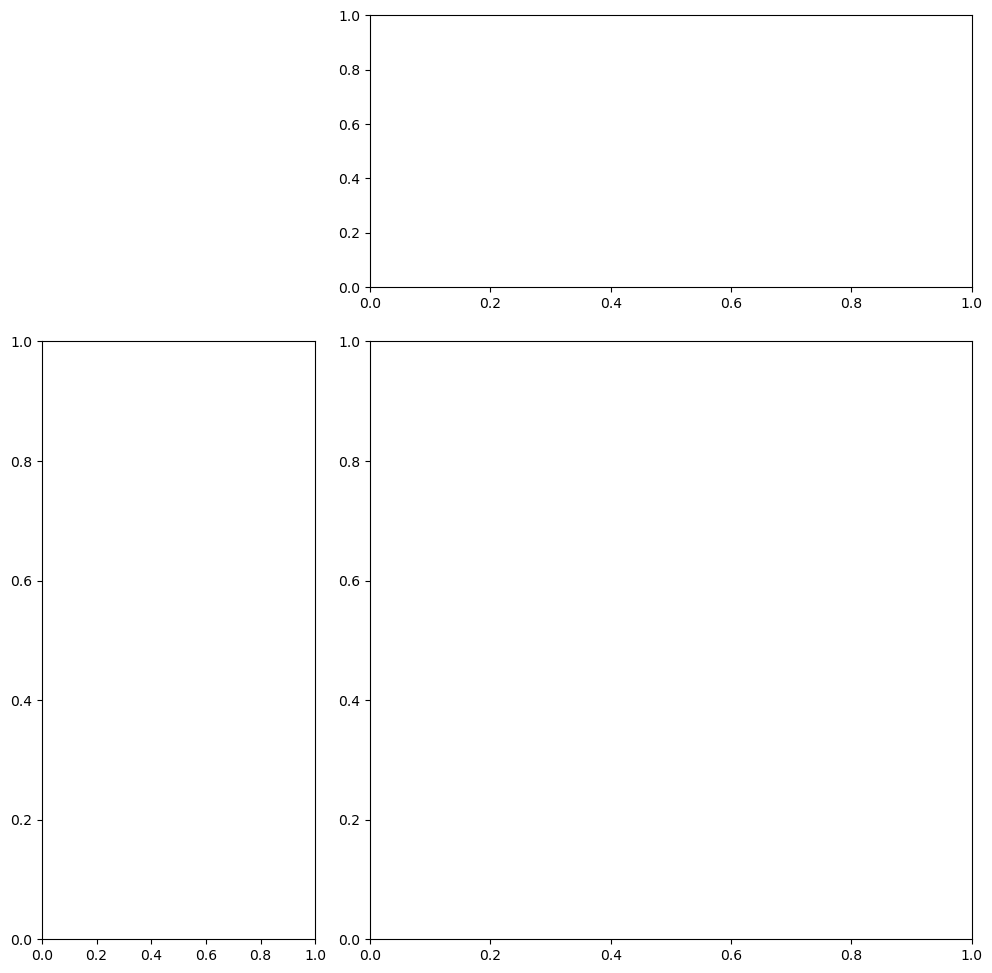

In [10]:
fig = plt.figure(figsize=(12, 12))

gs = fig.add_gridspec(3, 3)

ax_left = fig.add_subplot(gs[1:, 0])
ax_top = fig.add_subplot(gs[0, 1:])
ax_center = fig.add_subplot(gs[1:, 1:])

plt.show()

Indexing a `GridSpec` object returns a [`SubplotSpec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.SubplotSpec.html) object which can be passed to `Axes.add_subplot`.

Subplots can be nested with [`SubplotSpec.subgridspec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.SubplotSpec.html#matplotlib.gridspec.SubplotSpec.subgridspec). This method return a [`GridSpecFromSubplotSpec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpecFromSubplotSpec.html) object for which indexing returns `SubplotSpec` objects in the same way as for `GridSpec` objects.

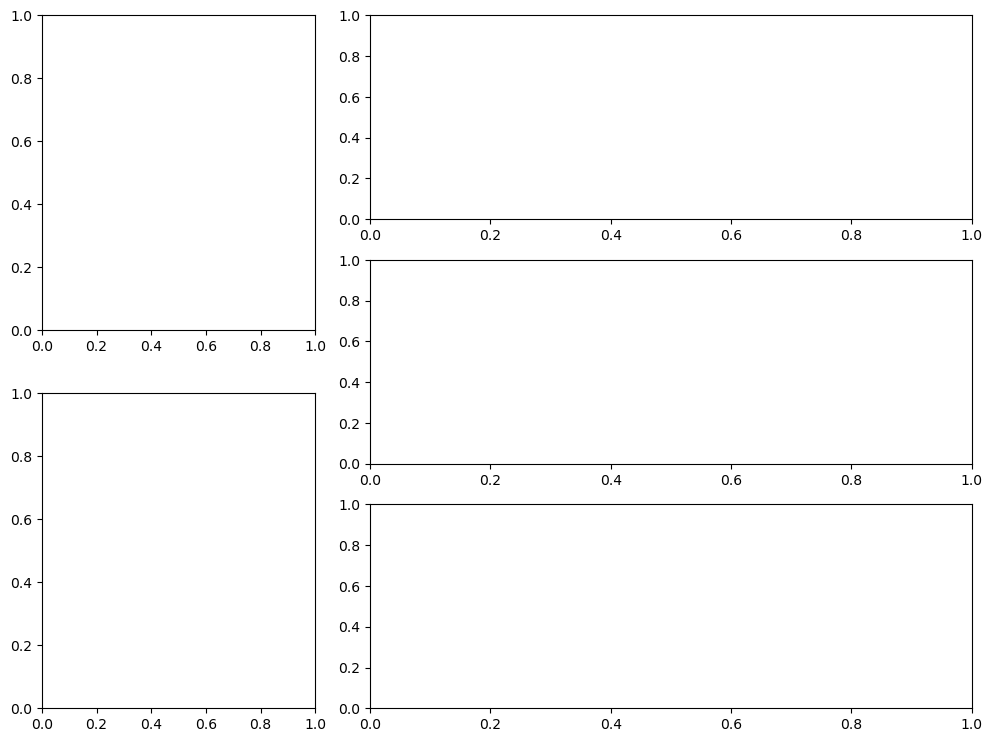

In [11]:
fig = plt.figure(figsize=(12, 9))

gs = fig.add_gridspec(1, 3)
gs_left = gs[0, 0].subgridspec(2, 1)
gs_right = gs[0, 1:].subgridspec(3, 1)

ax_left_top = fig.add_subplot(gs_left[0, 0])
ax_left_bottom = fig.add_subplot(gs_left[1, 0])
ax_right_top = fig.add_subplot(gs_right[0, 0])
ax_right_middle = fig.add_subplot(gs_right[1, 0])
ax_right_bottom = fig.add_subplot(gs_right[2, 0])

plt.show()

```{note}
The [`Figure.suptitle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) methods adds a title to the whole figure, not only to an `Axes` object (linke `Axes.title`).
```

### Multiple Figures

It's also possible to generate multiple `Figure` objects. In a simple Python shell this opens one window per figure. In a Jupyter notebook all figures are shown in the output cell.

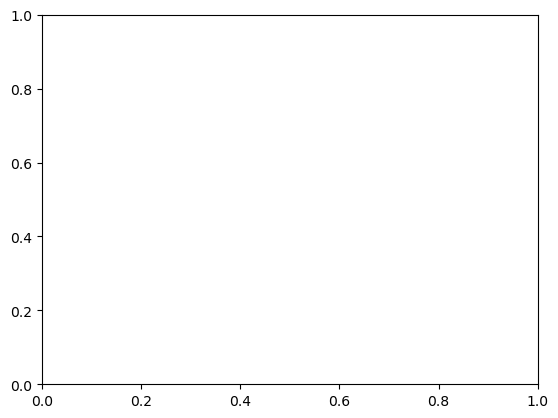

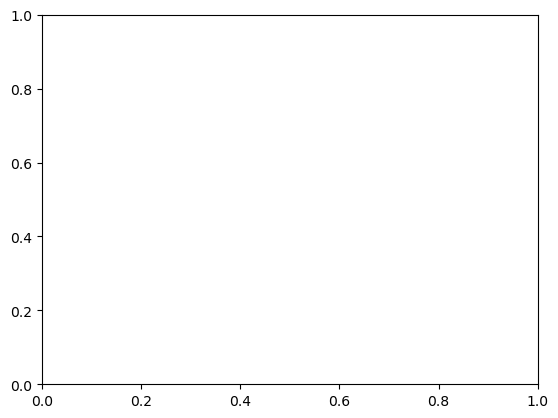

In [12]:
fig1, ax1 = plt.subplots()

fig2, ax2 = plt.subplots()

plt.show()

## Axis Properties

### Scaling and Limits

`Axes` objects provide several different methods for influencing axis scaling (linear, logarithmic) and axis limits (smallest and greatest value). With [`Axes.axis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html) scaling and limits for both axes can be set at once. The `Axes` methods [`set_xlim`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html), [`set_ylim`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html), [`set_xscale`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html), [`set_yscale`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html) allow for finer control.

Note that by default Matplotlib automatically sets axis limits to fit the plotted data. This behavior can be deactivated by calling `set_xlim` and `set_ylim` with parameter `auto=False`. Since `False` is the default value for `auto`, each call to `set_xlim` or `set_ylim` without providing the `auto` parameter deactivates automatic limits, too.

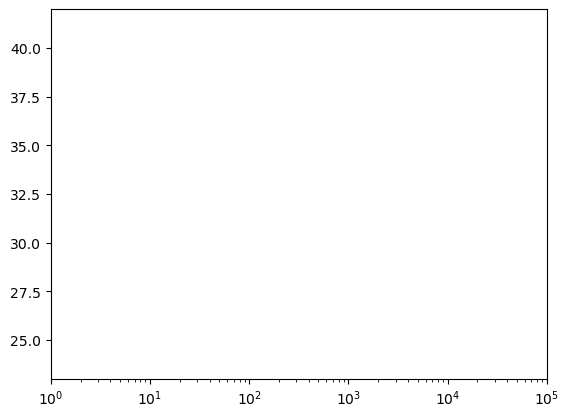

In [13]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_xlim(1, 1e5)

ax.set_ylim(23, 42)

plt.show()

Direction of coordinate axes can be changed by exchanging upper and lower limits of the axes.

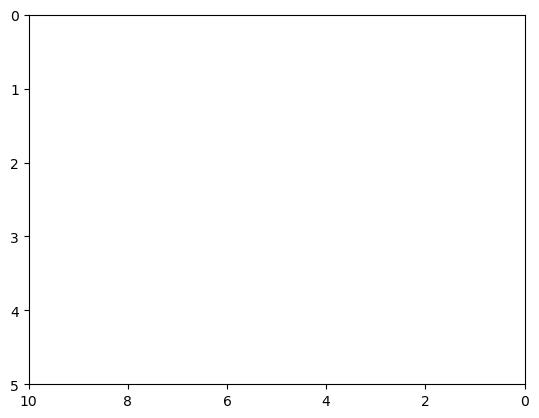

In [14]:
fig, ax = plt.subplots()

ax.set_xlim(10, 0)
ax.set_ylim(5, 0)

plt.show()

### Tick Positions and Labels

To modify tick positions and labels `Axes` objects provide methods [`set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html), [`set_yticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html), [`set_xticklabels`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html), [`set_yticklabels`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html).

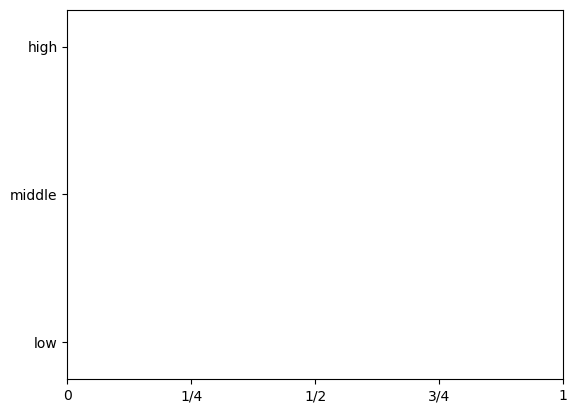

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0', '1/4', '1/2', '3/4', '1'])

ax.set_ylim(0, 1)
ax.set_yticks([0.1, 0.5, 0.9])
ax.set_yticklabels(['low', 'middle', 'high'])

plt.show()

Matplotlib distinguishes minor and major ticks. Passing the parameter `minor` with value `True` or `False` (default) switches between both variants. Passing an empty tick list removes all ticks from the axis.

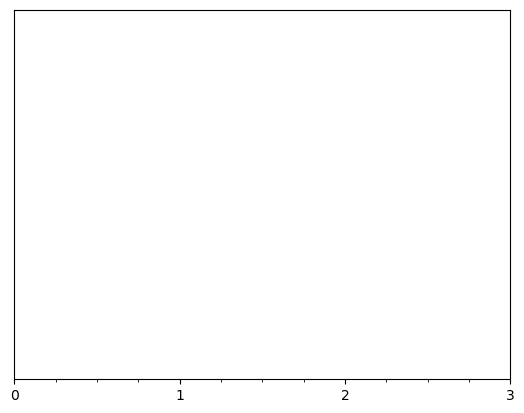

In [16]:
fig, ax = plt.subplots()

ax.set_xlim(0, 3)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticks([0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75], minor=True)
ax.set_xticklabels([], minor=True)

ax.set_ylim(0, 1)
ax.set_yticks([])

plt.show()

More avanced control of tick and tick label properties is provided by [`Axes.tick_params`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html). There we can specify tick size and color, font and color for labels, rotation of labels and much more.

### Grid Lines

Grid lines enhance readability of plots. They can be added and modified with [`Axes.grid`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html). More detailed control is provided by `Axes.tick_params`. Grid line positions always coincide with tick positions.

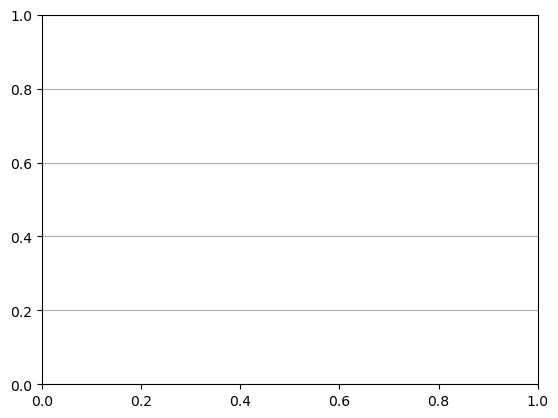

In [17]:
fig, ax = plt.subplots()

ax.grid(axis='y')

plt.show()

### Different Scales

Sometimes one wants to have two plots with different y axis limits in one figure. This can be achieved with [`Axes.twiny`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html) (there is also a [`twinx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)). Such figures then have two different y axes, one with ticks and labels at the left boundary of the drawing area and one with ticks and labels at the right boundary. The `twiny` methods sets this all up for us and returns a new `Axes` object overlaying the original one in a way which gives the desired result.

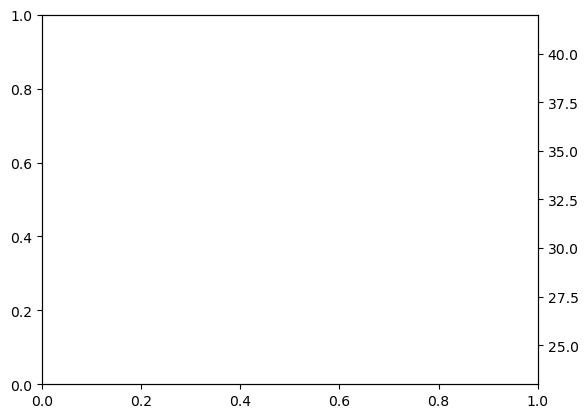

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_ylim(0, 1)
ax2.set_ylim(23, 42)

plt.show()

Both `Axes` objects share their x axis. Thus, to modify x axis properties it doesn't matter which of both `Axes` objects is modified. To modify y axis properties, corresponding `Axes` object has to be modified. For plotting the plotting methods of the `Axes` object with the correct y axis have to be called.

### Polar Plots

Matplotlib also provides support for plotting in polar coordinates. To create a polar plot pass the parameter `projection='polar'` when creating an `Axes` object (not supported by all variants for creating `Axes` objects).

Note that the object returned is not really an instance of the `Axes` class, but of [`PolarAxes`](https://matplotlib.org/stable/api/projections/polar.html#matplotlib.projections.polar.PolarAxes), which is derived from `Axes` and partly comes with different methods.

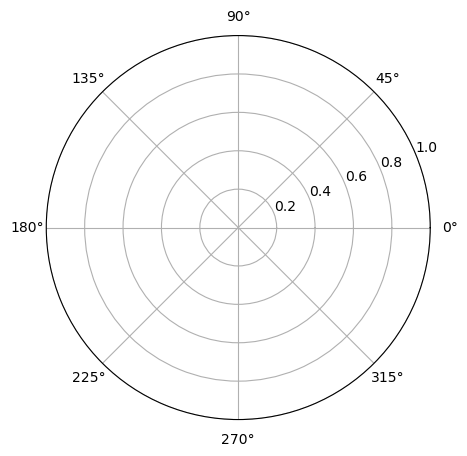

In [19]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='polar')

plt.show()

By default grid lines are turned on and tick labels are adapted to polar coordinates. But everything can be custimized with similar methods as before.

## Colors and Colorbars

## Specifying Colors

Whenever a Matplotlib function takes a color as argument different formats are accepted. Some of them are:

* tuples with 3 floats between 0 and 1 for red, green, blue components
* tuples with 4 floats between 0 and 1 for red, green, blue components and opacity
* string `'#rrggbb'` where rr, gg, bb are integers from 0 to 255 in hexadecimal notation for red, green, blue component
* string with only one character out of b (blue), g (green), r (red), c (cyan), m (magenta), y (yellow), k (black), w (white)
* string with pre-defined color name like `'white'` or `'red'` (lists of available color names: [with prefix `'tab:`'](https://matplotlib.org/stable/_images/sphx_glr_named_colors_002.png), [without prefix](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png), [with prefix `'xkcd:'`](https://i.stack.imgur.com/nCk6u.jpg))

By default Matplotlib uses the `'tab:'` prefixed colors and cycles through them if multiple lines are plotted.

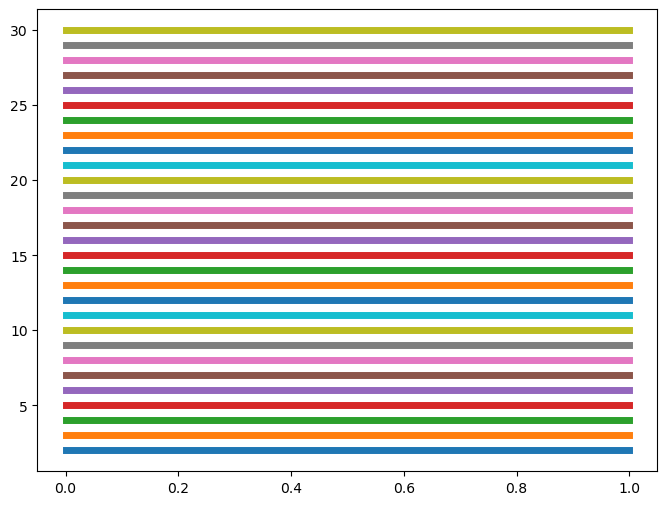

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

x = np.array([0, 1])
y = np.array([1, 1])

for n in range(1, 30):
    ax.plot(x, y + n, '-', linewidth=5)

plt.show()

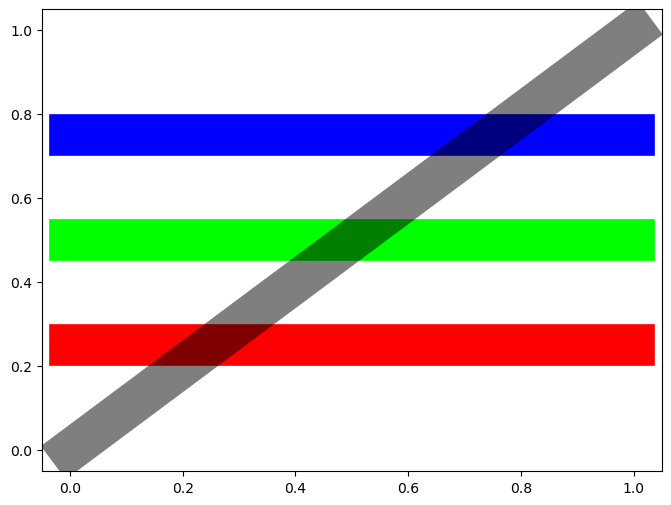

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(0, 1, 100)
y = np.ones(x.shape)

ax.plot(x, 0.25 * y, '-', linewidth=30, color='red')
ax.plot(x, 0.5 * y, '-', linewidth=30, color='#00ff00')
ax.plot(x, 0.75 * y, '-', linewidth=30, color=(0, 0, 1))
ax.plot(x, x, '-', linewidth=30, color=(0, 0, 0, 0.5))

plt.show()

### Converting Data to Colors

Some plot types allow color selection depending on the plotted data.

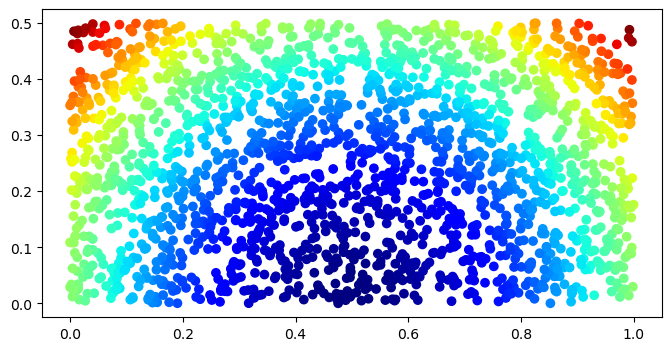

In [22]:
n = 2000    # number of samples

rng = np.random.default_rng(0)

x = rng.uniform(0, 1, n)
y = rng.uniform(0, 0.5, n)
z = (x - 0.5) ** 2 + y ** 2

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y, c=z, cmap='jet')

plt.show()

The [`Axes.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) method plots a list of points and colors them according to the values assigned to parameter `c`. Conversion from data to colors requires two steps:

* convert data values to values in the interval $[0,1]$,
* map the interval $[0,1]$ to a list of colors.

Default behavior for the first step is to map the maximal data value to 1, the minimal value to 0, and all values in between in a linear manner. This normalization process can be customized by creating a [`Ǹormalize`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html) object and passing it as parameter `norm` to `scatter` and similar methods.

Mapping the interval $[0,1]$ to colors is done via colormaps. There are many pre-defined colormaps, which can be passed as string to the `cmap` parameter ([list of pre-defined color maps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)). But custom colormaps can be created, too.

### Colorbars

Colorbars visualize the connection between data values and colors. They can be created with [`pyplot.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) or [`Figure.colorbar`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar).

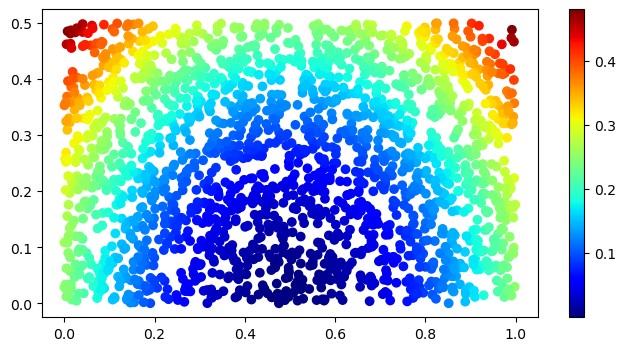

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(x, y, c=z, cmap='jet')
plt.colorbar()

plt.show()

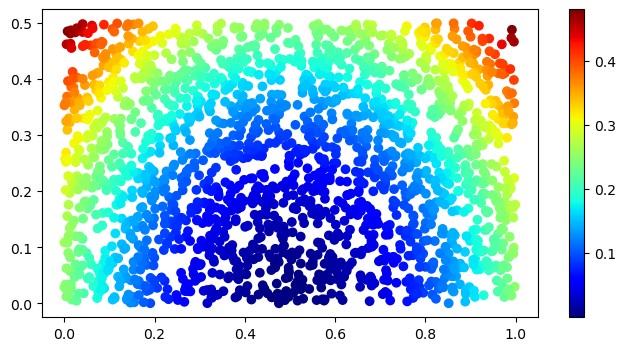

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))

scatter_plot = ax.scatter(x, y, c=z, cmap='jet')
fig.colorbar(scatter_plot, ax=ax, orientation='vertical')

plt.show()

## Legends and Text

### Legends

Simple legends can be generated automatically with [`Axes.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) in connection with the `label` argument to plotting methods. Each labeled line of a multi-line plot is represented in the legend and the legend is placed optimally, that is, covering as few data points as possible.

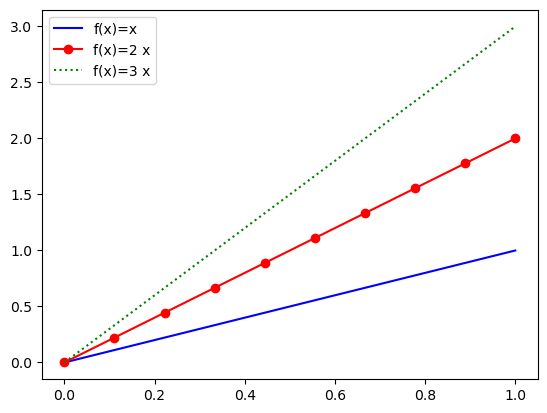

In [25]:
x = np.linspace(0, 1, 10)

fig, ax = plt.subplots()

ax.plot(x, x, '-b', label='f(x)=x')
ax.plot(x, 2 * x, '-or', label='f(x)=2 x')
ax.plot(x, 3 * x, ':g', label='f(x)=3 x')

ax.legend()

plt.show()

Alternatively, legend entries can be added manually.

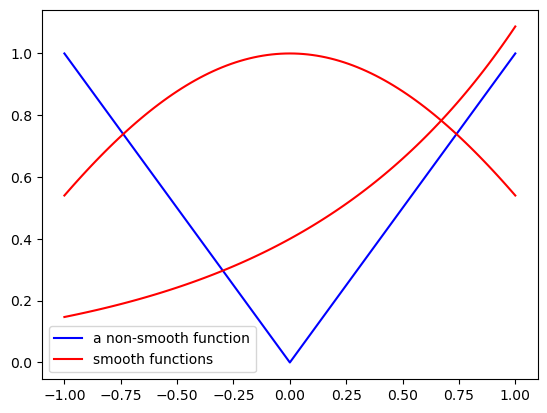

In [26]:
x = np.linspace(-1, 1, 101)

fig, ax = plt.subplots()

line1 = ax.plot(x, np.abs(x), '-b')[0]
line2 = ax.plot(x, np.cos(x), '-r')[0]
line3 = ax.plot(x, 0.4 * np.exp(x), '-r')[0]

ax.legend((line1, line2), ('a non-smooth function', 'smooth functions'))

plt.show()

The `legend` method takes *handles* as arguments to refer to lines and other graphical objects (called *artists* in Matplotlib). In Matplotlib the objects themselve are used as handles. Because `plot` returns a list of all `Line2D` objects created, we have to extract the first (and only) element of this list.

### TeX in Matplotlib Text

Mathematical formula can be used in Matplotlib via [TeX](https://en.wikipedia.org/wiki/TeX) commands. Matplotlib comes with its own TeX interpreter and supports many but not all TeX commands. TeX commands have to be enclosed in dollar signs. Because TeX commands almost always contain backslashs and Python interprets backslashs as special characters in strings, we have to use raw strings to pass TeX commands to Matplotlib.

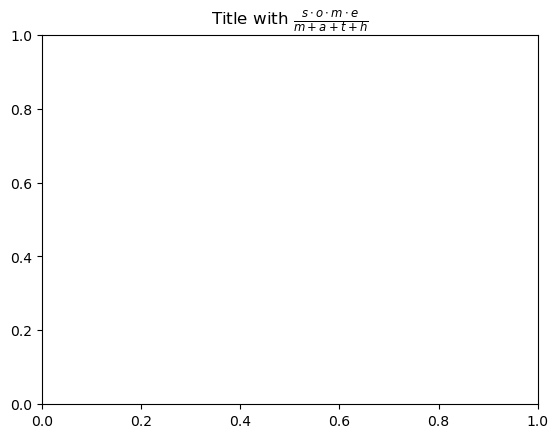

In [27]:
fig, ax = plt.subplots()

ax.set_title(r'Title with $\frac{s \cdot o \cdot m \cdot e}{m+a+t+h}$')

plt.show()

Full [LaTeX](https://en.wikipedia.org/wiki/LaTeX) typesetting is available, too, but requires an external LaTeX installation.

### Annotations

To add text to a plot use [`Axes.text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) method.

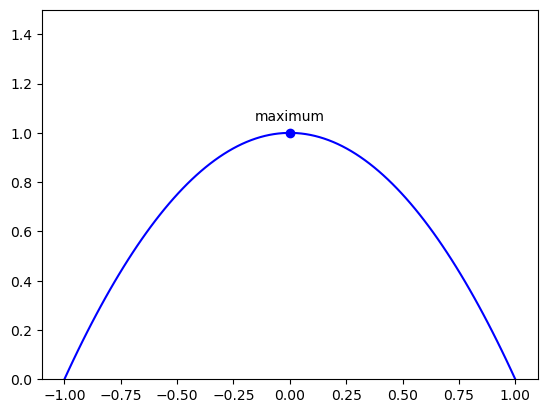

In [28]:
fig, ax = plt.subplots()

x = np.linspace(-1, 1, 100)
y = 1 - x ** 2

ax.plot(x, y, '-b')
ax.plot(0, 1, 'ob')
ax.set_ylim(0, 1.5)

ax.text(0, 1.05, 'maximum', ha='center')

plt.show()

More advanced annotation is provided by [`Axes.annotate`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html).

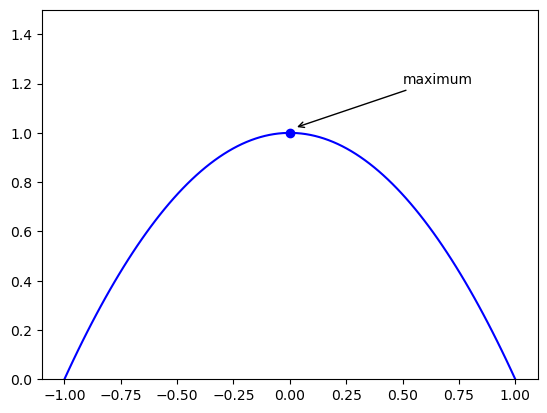

In [29]:
fig, ax = plt.subplots()

ax.plot(x, y, '-b')
ax.plot(0, 1, 'ob')
ax.set_ylim(0, 1.5)

ax.annotate('maximum', (0.02, 1.02), xytext=(0.5, 1.2), arrowprops={'arrowstyle': '->'})

plt.show()

## Geometric Objects

Matplotlib can create many types of geometric objects. Workflow is as follows: Create an object by instanciation. Then add it with [`Axes.add_artist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_artist.html) to an `Axes` object.

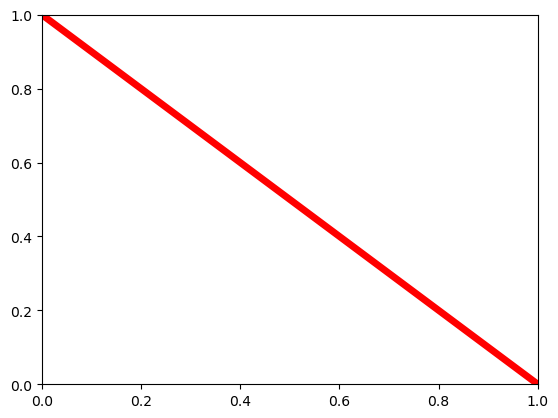

In [30]:
import matplotlib.lines

fig, ax = plt.subplots()

my_line = matplotlib.lines.Line2D([0, 1], [1, 0], color='red', linewidth=5)
ax.add_artist(my_line)

plt.show()

`Line2D` objects are created and returned by `Axes.plot`. They offer all the features (markers, different styles,...) known from function plotting.

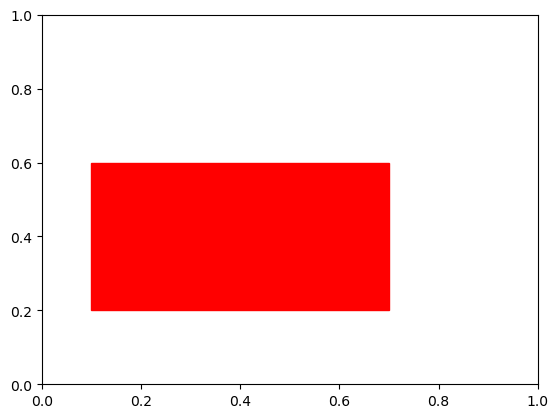

In [31]:
import matplotlib.patches

fig, ax = plt.subplots()

my_rect = matplotlib.patches.Rectangle((0.1, 0.2), 0.6, 0.4, color='red')
ax.add_artist(my_rect)

plt.show()

Have a look at this [list of classes in `matplotlib.patches`](https://matplotlib.org/stable/api/patches_api.html) or at this [example](https://matplotlib.org/examples/shapes_and_collections/artist_reference.html) to get an idea of what shapes are provided next to rectangles.

## Raster Images

Raster images can be represented in different ways:
* (m, n) dimensional NumPy array (each entry is interpreted as grey level or, more generally, as argument to a colormap)
* (m, n, 3) dimensional NumPy array (the third dimension contains red, green, blue components for each pixel)
* (m, n, 4) dimensiona NumPy array (red, green, blue, opacity)

Plotting raster images is done with [`Axes.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html). To load an image from a file use [`matplotlib.image.imread`](https://matplotlib.org/stable/api/image_api.html#matplotlib.image.imread) or [`pyplot.imread`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html).

(943, 800, 4)


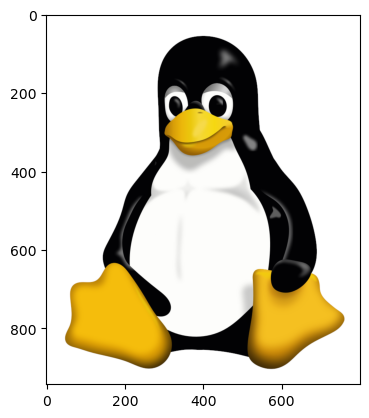

In [32]:
img = plt.imread('tux.png')
print(img.shape)

fig, ax = plt.subplots()

ax.imshow(img)

plt.show()

The `imshow` method has several parameters. With `extent` we can accurately place an image in an existing plot.

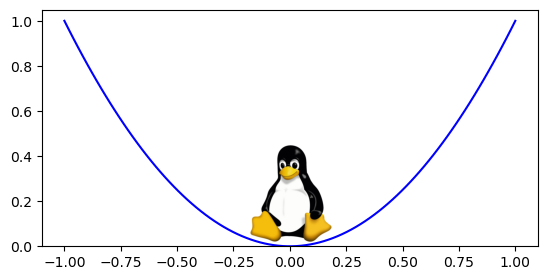

In [33]:
x = np.linspace(-1, 1, 100)
y = x ** 2

m = img.shape[0]
n = img.shape[1]

fig, ax = plt.subplots()

ax.imshow(img, extent=(-0.2, 0.2, 0, 0.4 / n * m))
ax.plot(x, y, '-b')

plt.show()

```{hint}
For grayscale images provide `cmap`, `vmin`, `vmax` arguments to `imshow` in the same way as for scatter plots.
```

## Complex Visualizations

### Plot Types

Up to now we mainly used `Axes.plot` and `Axes.scatter`. But there are many more very useful plot types we do not discuss in detail. Here are some of them:

* [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) (line plots)
* [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) (point clouds)
* [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) (bar plots)
* [pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html) (pie charts)
* [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) (histograms)
* [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html) (contour plots)

More plot types are listed in [`Axes`'s documentation](https://matplotlib.org/stable/api/axes_api.html#plotting).

To get an idea of what is possible with Matplotlib have a look at the [gallery](https://matplotlib.org/stable/gallery/index.html).

### Saving Plots and Postprocessing

Plots can be saved to image files with [`Figure.savefig`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.save_fig).

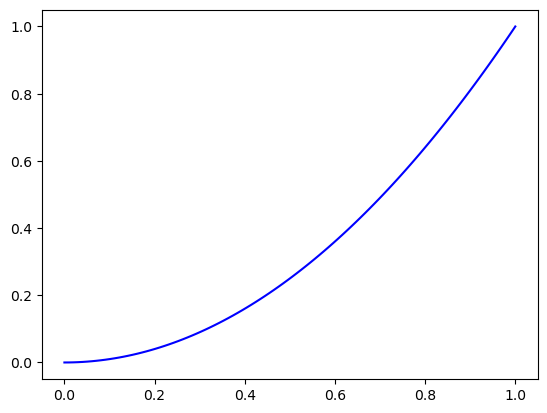

In [34]:
fig_svgfile = 'saved.svg'
fig_pngfile = 'saved.png'

x = np.linspace(0, 1, 100)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, y, '-b')

plt.show()

fig.savefig(fig_svgfile)
fig.savefig(fig_pngfile, dpi=200)

After saving a figure postprocessing with external tools is possible. For raster images use, for instance, [GIMP](https://www.gimp.org). For vector graphics [Inkscape](https://inkscape.org) is a good choice. Next to addition of advanced graphical effects postprocessing also includes composing several plots to factsheets.